In [7]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


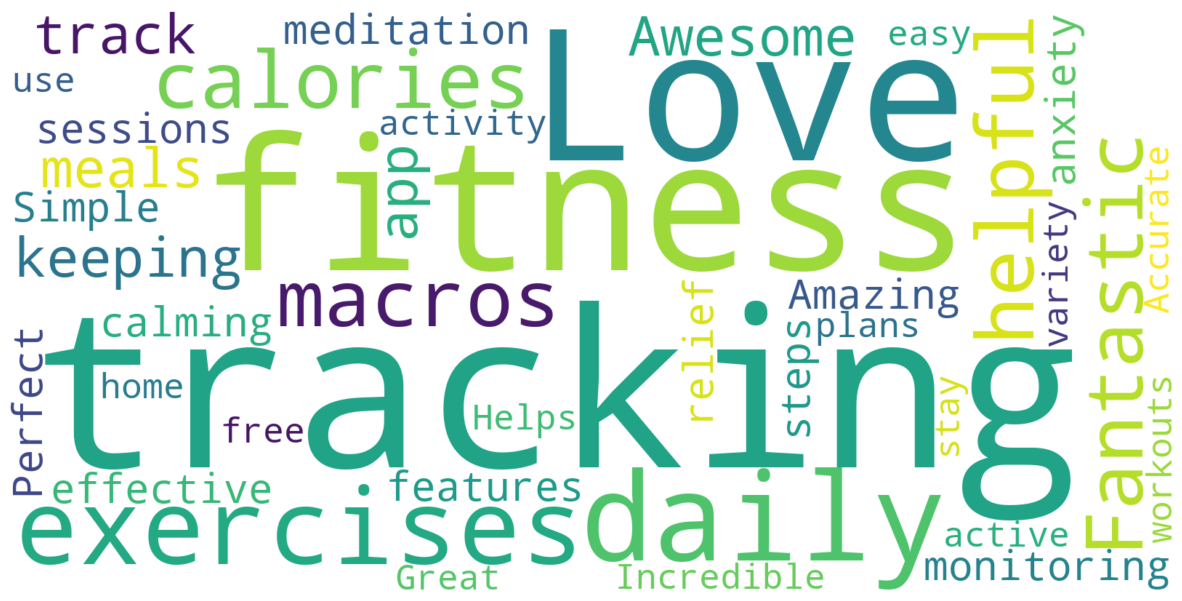

In [8]:
apps_df = pd.read_csv('wordcloud.csv')
reviews_df = pd.read_csv('userreview.csv')
merged_df = pd.merge(reviews_df, apps_df[['App', 'Category']], on='App', how='inner')
filtered_df = merged_df[(merged_df['Category'] == 'Health & Fitness') & (merged_df['Sentiment'] == 'Positive')]
text = " ".join(review for review in filtered_df['Translated_Review'].dropna())
stopwords = set(STOPWORDS)
app_names = set(apps_df['App'].str.lower().tolist())
stopwords = stopwords.union(app_names)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()